Lectures 11-13: Radioactive Decay

In [2]:
import numpy as np
from IPython.core.display import HTML
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

In [ ]:
nb_list = !jupyter notebook list
server = [l for l in nb_list if 'eos240' in l][0].split(' :: ')[0]
prefix = server.split('?')[0]
token = server.split('?')[1]
notebook = 'Lecture11.ipynb'
url = prefix+'notebooks/'+notebook+'?'+token
!decktape -s '1920x1080' rise $url pdf_slides/Lecture11.pdf

Loading page http://localhost:8888/notebooks/Lecture11.ipynb?token=4cae165ea31fbb5b095f34a999d30b1cb018c54ad681e90a ...
actions jupyter-notebook:find-and-replace does not exist, still binding it in case it will be defined later...
load_extensions {
  '0': 'nbextensions_configurator/config_menu/main',
  '1': 'contrib_nbextensions_help_item/main',
  '2': 'rise/main',
  '3': 'jupyter-js-widgets/extension',
  '4': 'jupyter-black-master/jupyter-black',
  '5': 'toc2/main',
  '6': 'hide_code/hide_code',
  '7': 'hide_input/main',
  '8': 'codefolding/main',
  '9': 'splitcell/splitcell'
}
Loaded moment locale en-gb
Failed to load resource: the server responded with a status of 404 (Not Found)
HTML Sanitizer div.style changed {
  change: 'changed',
  tagName: 'div',
  attribName: 'style',
  oldValue: 'background: url(images/decay_01.jpg) 80% 50% no-repeat;\n' +
    '  width: 1290px;\n' +
    '  height: 281px; background-size: 50%;',
  newValue: 'background: url("images/decay_01.jpg") 80% 50% no-r

Session: kernel_created (c3efe948-6c5a-47f6-9a2a-5f7791edfb0c)
Starting WebSockets: ws://localhost:8888/api/kernels/c967c939-c2fe-4dea-8cdc-e3b7e9ff95a0
Failed to load extension: [ 'nbextensions/hide_code/hide_code' ] {
  requireType: 'scripterror',
  requireModules: [ 'nbextensions/hide_code/hide_code' ],
  originalError: { isTrusted: true }
}
Loading extension: nbextensions_configurator/config_menu/main
Loading extension: contrib_nbextensions_help_item/main
Loading extension: rise/main
Loading extension: jupyter-js-widgets/extension
Loading extension: hide_input/main
Loading extension: splitcell/splitcell
center
center
center
center
Kernel: kernel_connected (c967c939-c2fe-4dea-8cdc-e3b7e9ff95a0)
Failed to load resource: the server responded with a status of 404 (Not Found)
Widgets are not available.  Please install widgetsnbextension or ipywidgets 4.0
Loading extension: jupyter-black-master/jupyter-black
Loading extension: toc2/main
[toc2] Notebook fully loaded -- toc2 initialized 
L

<center><div style="background: url(images/decay_01.jpg) 80% 50% no-repeat;
  width: 1290px;
  height: 281px; background-size: 50%;">
</div></center>

# Lecture 11-13: Radioactive Decay

<div style='font-size:25px'>  

1. Mechanisms
1. The decay equation
    1. Isochrons
    1. Sm-Nd system
    1. Pb-Pb dating (age of the Earth)
    
    
</div>

<div style='font-size:25px'> <i>We acknowledge and respect the lək̓ʷəŋən peoples on whose traditional territory the university stands and the Songhees, Esquimalt and W̱SÁNE&#262; peoples whose historical relationships with the land continue to this day.</i></div>

Mechanisms of radioactive decay.
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L11_S1_F0.svg"/>
    </div>
</center>



The decay equation.
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L11_S2_F0.svg"/>
    </div>
</center>



The decay equation.
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L11_S3_F0.svg"/>
    </div>
</center>



Half life
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L11_S5_F0.svg"/>
    </div>
</center>



<div style='height:70vh'><center>
<img src="images/decay_chain_uranium.jpg" style="height:70vh">U-238 decay chain
</center></div>

U-Series dating of corals
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L12_S6_F0.svg"/>
    </div>
</center>



<div style='height:70vh'><center>
<img src="images/bah5.jpg" style="height:70vh">
</center></div>

Isochrons
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L12_S8_F0.svg"/>
    </div>
</center>



<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L12_S9_F0.svg"/>
    </div>
</center>



Recall:
$$ N_0 e^{-\lambda t} = N$$

In [3]:
N_0 = 1 # parent isotope initial
LAMBDA = 1e-4 # decay constant
t = np.linspace(0, 1e5, 1000) #time (from now to 100 thousand years ago)
N = N_0 * np.exp(-LAMBDA * t) # parent isotope
D = N_0 - N #descendant isotope

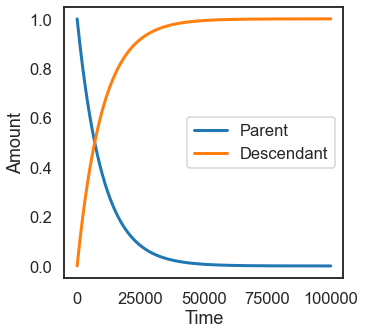

In [4]:
plt.figure(figsize=(5, 5))
plt.plot(t, N, label="Parent", alpha=1, lw=3)
plt.plot(t, D, label="Descendant", alpha=1, lw=3)
plt.legend(loc="best")
_ = plt.gca().set_xlabel("Time")
_ = plt.gca().set_ylabel("Amount")

Batch melting:
$$\dfrac{C_S}{C_0} = \dfrac{D}{F+D(1-F)}$$

In [10]:
def batch_S(F, D, Co): #batch melting equation for solid
    return (D*Co) / (F + D * (1 - F))

D_n = np.array([1,2,3,4]) #a list of partition coefficients
F = 0.8 #melt fraction
N_0 = batch_S(F, D_n, 1) #C_l for each F

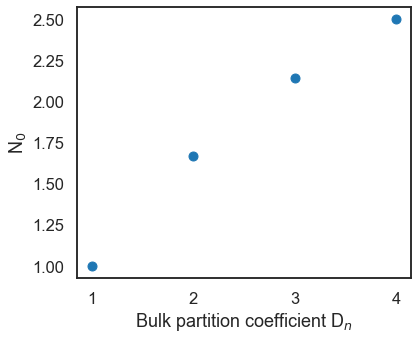

In [11]:
plt.figure(figsize=(6, 5))
plt.plot(D_n, N_0, "o")
_ = plt.gca().set_xlabel("Bulk partition coefficient D$_n$")
_ = plt.gca().set_ylabel("N$_0$")

In [15]:
N = [n * np.exp(-LAMBDA * t[:100]) for n in N_0] # the decay equation for each starting N
C = [(n - NS) for n, NS in zip(N_0, N)] # the descendant isotope (initial minus current)

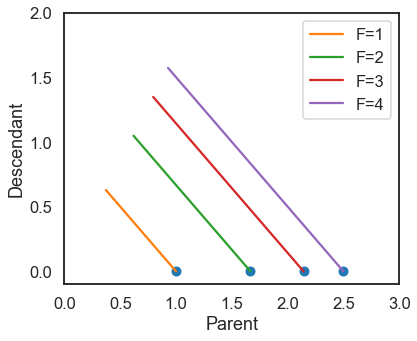

In [17]:
plt.figure(figsize=(6, 5))
plt.plot(N_0, [0, 0, 0, 0], "o", alpha=1)
_ = [plt.plot(a, b, label="F=" + str(c), alpha=1) for a, b, c in zip(N, C, D_n)]
plt.legend(loc="best")
_ = plt.gca().set_xlabel("Parent") 
_ = plt.gca().set_ylabel("Descendant")
_ = plt.gca().set_xlim([0, 3])
_ = plt.gca().set_ylim([-0.1, 2])

In [18]:
np.random.seed(12)
N = [n * np.exp(-LAMBDA * t[:50]) for n in N_0] # the decay equation for each starting N
Ic = 0.5*np.ones(4) # some fixed amount of initial child isotope
C = [i + (n - NS) for i, n, NS in zip(Ic, N_0, N)] # the descendant isotope (initial parent minus current)

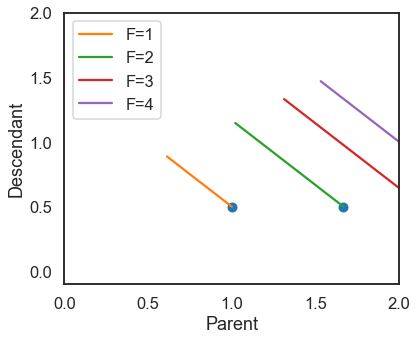

In [19]:
plt.figure(figsize=(6, 5))
plt.plot(N_0, Ic, "o")
_ = [plt.plot(a, b, label="F=" + str(c)) for a, b, c in zip(N, C, D_n)]
plt.legend(loc="best")
_ = plt.gca().set_xlabel("Parent")
_ = plt.gca().set_ylabel("Descendant")
_ = plt.gca().set_xlim([0, 2])
_ = plt.gca().set_ylim([-0.1, 2])

In [20]:
Ic = 0.5 + np.array(np.random.normal(0.0, 0.2, 4)) # some random amount of initial child isotope
C = [i + (n - NS) for i, n, NS in zip(Ic, N_0, N)] # the descendant isotope (initial parent minus current)

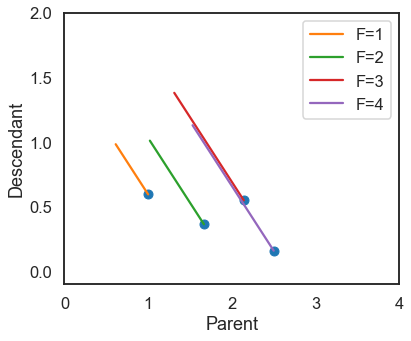

In [22]:
plt.figure(figsize=(6, 5))
plt.plot(N_0, Ic, "o")
_ = [plt.plot(a, b, label="F=" + str(c)) for a, b, c in zip(N, C, D_n)]
plt.legend(loc="best")
_ = plt.gca().set_xlabel("Parent")
_ = plt.gca().set_ylabel("Descendant")
_ = plt.gca().set_xlim([0, 4])
_ = plt.gca().set_ylim([-0.1, 2])

<h4>Utility</h4>
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L13_S12_F0.svg"/>
    </div>
</center>



<h4>Sm-Nd decay and model ages (the chondritic uniform reservoir or CHUR)</h4>
$^{147}$Sm decays to $^{143}$Nd through alpha decay with a decay constant of $\lambda^{147}$=$6.54\times10^{-12}$


<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L13_S11_F0.svg"/>
    </div>
</center>



<h4>Age of the Earth</h4>
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L13_S13_F0.svg"/>
    </div>
</center>



<h4>Age of the Earth</h4>
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L13_S14_F0.svg"/>
    </div>
</center>




<h4>Age of the Earth</h4>
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L13_S15_F0.svg"/>
    </div>
</center>




<h4>Age of the Earth</h4>
<center>
    <div style='height:70vh;'>
	    <img style="height:70vh;" src="chalkboard_images/L13_S16_F0.svg"/>
    </div>
</center>



<div style='height:100vh'><center>
<img src="images/patterson.png" style="height:86vh"><br>Age of meteorites and the earth. Claire Patterson 1956
</center></div>